# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [3]:
# Cargar todas las librerías

%pip install seaborn
%pip install scipy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuración para mostrar gráficos en línea y ajustar estilos
%matplotlib inline
sns.set(style="whitegrid")



Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ---------- ----------------------------- 10.5/38.5 MB 51.0 MB/s eta 0:00:01
   ------------------------- -------------- 24.6/38.5 MB 58.8 MB/s eta 0:00:01
   ---------------------------------------  38.3/38.5 MB 61.6 MB/s eta 0:00:01
   ---------------------------------------- 38.5/38.5 MB 40.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## Cargar datos

In [4]:
# Carga los archivos de datos en diferentes DataFrames

calls = pd.read_csv(r'../Datasets/Sprint 5/megaline_calls.csv')
internet = pd.read_csv(r'../Datasets/Sprint 5/megaline_internet.csv')
messages = pd.read_csv(r'../Datasets/Sprint 5/megaline_messages.csv')
plans = pd.read_csv(r'../Datasets/Sprint 5/megaline_plans.csv')
users = pd.read_csv(r'../Datasets/Sprint 5/megaline_users.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [6]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
print("Información general del DataFrame 'plans':")
print(plans.info())
print("\nDescripción estadística:")
print(plans.describe(include='all'))

# Imprime una muestra de los datos para las tarifas
print("\nMuestra de datos de 'plans':")
print(plans.head())


Información general del DataFrame 'plans':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes
None

Descripción estadística:
        messages_included  mb_per_month_included  minutes_included  \
count            2.000000               2.000000          2.000000   
unique                NaN                    NaN               NaN   
top                   NaN    

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**Descripción y observaciones:**

El DataFrame plans contiene la información de las tarifas ofrecidas por Megaline.
Al revisar la información general y la muestra, debes verificar:
Que los tipos de datos sean correctos (por ejemplo, precios y límites como numéricos).
Que no haya valores ausentes.
Que los nombres de las columnas sean claros y estén bien escritos.
Si encuentras problemas como tipos de datos incorrectos o valores nulos, será necesario corregirlos (por ejemplo, usando astype() para cambiar tipos o fillna() para completar valores faltantes).
Si todo está correcto, puedes continuar con el análisis.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [7]:
# Corregir los problemas obvios con los datos del DataFrame 'plans'

# Verifica si hay valores nulos
print("Valores nulos por columna:")
print(plans.isnull().sum())

# Verifica y corrige tipos de datos si es necesario
print("\nTipos de datos antes de corregir:")
print(plans.dtypes)

# Ejemplo de corrección (ajusta según lo que observes en tu salida):
# Si alguna columna numérica está como objeto, conviértela:
# plans['column_name'] = plans['column_name'].astype(float)

# Si hay valores nulos, puedes rellenarlos o decidir cómo tratarlos:
# plans['column_name'] = plans['column_name'].fillna(valor)

# Vuelve a mostrar los tipos de datos después de posibles correcciones
print("\nTipos de datos después de corregir:")
print(plans.dtypes)

Valores nulos por columna:
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

Tipos de datos antes de corregir:
messages_included          int64
mb_per_month_included      int64
minutes_included           int64
usd_monthly_pay            int64
usd_per_gb                 int64
usd_per_message          float64
usd_per_minute           float64
plan_name                 object
dtype: object

Tipos de datos después de corregir:
messages_included          int64
mb_per_month_included      int64
minutes_included           int64
usd_monthly_pay            int64
usd_per_gb                 int64
usd_per_message          float64
usd_per_minute           float64
plan_name                 object
dtype: object


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [8]:
# Enriquecer los datos del DataFrame 'plans'

# Crea una columna con el costo por minuto extra si no existe (ejemplo)
if 'usd_per_minute' not in plans.columns and 'usd_per_minute_over' in plans.columns:
    plans['usd_per_minute'] = plans['usd_per_minute_over']

# Crea una columna con el costo por mensaje extra si no existe (ejemplo)
if 'usd_per_message' not in plans.columns and 'usd_per_message_over' in plans.columns:
    plans['usd_per_message'] = plans['usd_per_message_over']

# Crea una columna con el costo por MB extra si no existe (ejemplo)
if 'usd_per_gb' not in plans.columns and 'usd_per_gb_over' in plans.columns:
    plans['usd_per_gb'] = plans['usd_per_gb_over']

# Puedes agregar más columnas útiles según lo que observes en los datos
print(plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Usuarios/as

In [9]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
print("Información general del DataFrame 'users':")
print(users.info())
print("\nDescripción estadística:")
print(users.describe(include='all'))

Información general del DataFrame 'users':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None

Descripción estadística:
            user_id first_name  last_name         age  \
count    500.000000        500        500  500.000000   
unique          NaN        458        399         NaN   
top             NaN    Seymour  Wilkinson         NaN   
freq            NaN          3          3         NaN   
mean    1249.500000        NaN        NaN   45.486000   
std      144.481833        Na

In [10]:
# Imprime una muestra de datos para usuarios
print("\nMuestra de datos de 'users':")
print(users.head())


Muestra de datos de 'users':
   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**Observaciones:**
- Verifica que los tipos de datos sean correctos (por ejemplo, fechas como datetime, ids como enteros, etc.).
- Revisa si hay valores ausentes.
- Asegúrate de que los nombres de las columnas sean claros.
- Si hay problemas, corrígelos a continuación.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [11]:
# Corregir los datos
# Convertir columnas de fecha si es necesario
if 'reg_date' in users.columns:
    users['reg_date'] = pd.to_datetime(users['reg_date'], errors='coerce')
if 'churn_date' in users.columns:
    users['churn_date'] = pd.to_datetime(users['churn_date'], errors='coerce')

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [12]:
# Rellenar valores nulos si es necesario (ejemplo para churn_date)
if 'churn_date' in users.columns:
    users['churn_date'] = users['churn_date'].fillna(pd.NaT)

# Vuelve a mostrar los tipos de datos después de posibles correcciones
print("\nTipos de datos después de correcciones:")
print(users.dtypes)

# Enriquecer los datos
# Ejemplo: crear una columna que indique si el usuario está activo o no
if 'churn_date' in users.columns:
    users['is_active'] = users['churn_date'].isna()

print("\nMuestra de datos enriquecidos de 'users':")
print(users.head())


Tipos de datos después de correcciones:
user_id                int64
first_name            object
last_name             object
age                    int64
city                  object
reg_date      datetime64[ns]
plan                  object
churn_date    datetime64[ns]
dtype: object

Muestra de datos enriquecidos de 'users':
   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

    reg_date      plan churn_date  is_active  
0 2018-12-24  ultimate        NaT       True  
1 2018-08-13      surf        NaT       True  
2 2018-10-21      surf        NaT       True  
3

## Llamadas

In [14]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
print("Información general del DataFrame 'calls':")
print(calls.info())
print("\nDescripción estadística:")
print(calls.describe(include='all'))

Información general del DataFrame 'calls':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None

Descripción estadística:
              id        user_id   call_date       duration
count     137735  137735.000000      137735  137735.000000
unique    137735            NaN         351            NaN
top     1499_203            NaN  2018-12-27            NaN
freq           1            NaN        1091            NaN
mean         NaN    1247.658046         NaN       6.745927
std          NaN     139.416268         NaN       5.839241
min          NaN    1000.000000         NaN       0.000000
25%          NaN    1128.000000     

In [15]:
# Imprime una muestra de datos para las llamadas
print("\nMuestra de datos de 'calls':")
print(calls.head())



Muestra de datos de 'calls':
         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**Observaciones:**
- Revisa si los tipos de datos son correctos (por ejemplo, fechas como datetime, duración como numérico).
- Verifica si hay valores ausentes.
- Asegúrate de que los nombres de las columnas sean claros.
- Si hay problemas, deberás corregirlos (por ejemplo, usando astype() o fillna()).

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [16]:
# Corregir los datos del DataFrame 'calls'

# Convertir columnas de fecha si es necesario
if 'call_date' in calls.columns:
    calls['call_date'] = pd.to_datetime(calls['call_date'], errors='coerce')

# Verificar y corregir tipos de datos numéricos
if 'duration' in calls.columns and not np.issubdtype(calls['duration'].dtype, np.number):
    calls['duration'] = pd.to_numeric(calls['duration'], errors='coerce')

# Rellenar valores nulos si es necesario
calls = calls.fillna({'duration': 0})

# Verifica los cambios
print("\nTipos de datos después de correcciones:")
print(calls.dtypes)
print("Valores nulos por columna después de correcciones:")
print(calls.isnull().sum())


Tipos de datos después de correcciones:
id                   object
user_id               int64
call_date    datetime64[ns]
duration            float64
dtype: object
Valores nulos por columna después de correcciones:
id           0
user_id      0
call_date    0
duration     0
dtype: int64


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [17]:
# Enriquecer los datos
# Ejemplo: crear una columna con la duración redondeada al minuto superior (como suelen cobrar las compañías)
if 'duration' in calls.columns:
    calls['minutes'] = np.ceil(calls['duration']).astype(int)

print("\nMuestra de datos enriquecidos de 'calls':")
print(calls.head())


Muestra de datos enriquecidos de 'calls':
         id  user_id  call_date  duration  minutes
0   1000_93     1000 2018-12-27      8.52        9
1  1000_145     1000 2018-12-27     13.66       14
2  1000_247     1000 2018-12-27     14.48       15
3  1000_309     1000 2018-12-28      5.76        6
4  1000_380     1000 2018-12-30      4.22        5


## Mensajes

In [18]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
print("Información general del DataFrame 'messages':")
print(messages.info())
print("\nDescripción estadística:")
print(messages.describe(include='all'))

Información general del DataFrame 'messages':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None

Descripción estadística:
              id       user_id message_date
count      76051  76051.000000        76051
unique     76051           NaN          351
top     1497_613           NaN   2018-12-28
freq           1           NaN          702
mean         NaN   1245.972768          NaN
std          NaN    139.843635          NaN
min          NaN   1000.000000          NaN
25%          NaN   1123.000000          NaN
50%          NaN   1251.000000          NaN
75%          NaN   1362.000000          NaN
max          NaN   1497.000000          NaN


In [19]:
# Imprime una muestra de datos para los mensajes
print("\nMuestra de datos de 'messages':")
print(messages.head())


Muestra de datos de 'messages':
         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**Observaciones:**

- Verifica si los tipos de datos son correctos (por ejemplo, fechas como datetime, cantidad de mensajes como numérico).
- Revisa si hay valores ausentes.
- Asegúrate de que los nombres de las columnas sean claros.
- Si hay problemas, corrígelos a continuación.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [20]:
# Corregir los datos
# Convertir columnas de fecha si es necesario
if 'message_date' in messages.columns:
    messages['message_date'] = pd.to_datetime(messages['message_date'], errors='coerce')

# Verificar y corregir tipos de datos numéricos
if 'messages' in messages.columns and not np.issubdtype(messages['messages'].dtype, np.number):
    messages['messages'] = pd.to_numeric(messages['messages'], errors='coerce')

# Rellenar valores nulos si es necesario
messages = messages.fillna({'messages': 0})

# Verifica los cambios
print("\nTipos de datos después de correcciones:")
print(messages.dtypes)
print("Valores nulos por columna después de correcciones:")
print(messages.isnull().sum())


Tipos de datos después de correcciones:
id                      object
user_id                  int64
message_date    datetime64[ns]
dtype: object
Valores nulos por columna después de correcciones:
id              0
user_id         0
message_date    0
dtype: int64


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [21]:
# Enriquecer los datos
# Ejemplo: crear una columna con el mes del mensaje
if 'message_date' in messages.columns:
    messages['month'] = messages['message_date'].dt.month

print("\nMuestra de datos enriquecidos de 'messages':")
print(messages.head())


Muestra de datos enriquecidos de 'messages':
         id  user_id message_date  month
0  1000_125     1000   2018-12-27     12
1  1000_160     1000   2018-12-31     12
2  1000_223     1000   2018-12-31     12
3  1000_251     1000   2018-12-27     12
4  1000_255     1000   2018-12-26     12


## Internet

In [22]:
# Imprime la información general/resumida sobre el DataFrame de internet
print("Información general del DataFrame 'internet':")
print(internet.info())
print("\nDescripción estadística:")
print(internet.describe(include='all'))

Información general del DataFrame 'internet':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None

Descripción estadística:
              id        user_id session_date        mb_used
count     104825  104825.000000       104825  104825.000000
unique    104825            NaN          351            NaN
top     1499_219            NaN   2018-12-24            NaN
freq           1            NaN          851            NaN
mean         NaN    1242.496361          NaN     366.713701
std          NaN     142.053913          NaN     277.170542
min          NaN    1000.000000          NaN       0.000000
25%    

In [23]:
# Imprime una muestra de datos para el tráfico de internet
print("\nMuestra de datos de 'internet':")
print(internet.head())


Muestra de datos de 'internet':
         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**Observaciones:**
- Verifica si los tipos de datos son correctos (por ejemplo, fechas como datetime, megabytes como numérico).
- Revisa si hay valores ausentes.
- Asegúrate de que los nombres de las columnas sean claros.
- Si hay problemas, corrígelos a continuación.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [24]:
# Corregir los datos
# Convertir columnas de fecha si es necesario
if 'session_date' in internet.columns:
    internet['session_date'] = pd.to_datetime(internet['session_date'], errors='coerce')

# Verificar y corregir tipos de datos numéricos
if 'mb_used' in internet.columns and not np.issubdtype(internet['mb_used'].dtype, np.number):
    internet['mb_used'] = pd.to_numeric(internet['mb_used'], errors='coerce')

# Rellenar valores nulos si es necesario
internet = internet.fillna({'mb_used': 0})

# Verifica los cambios
print("\nTipos de datos después de correcciones:")
print(internet.dtypes)
print("Valores nulos por columna después de correcciones:")
print(internet.isnull().sum())


Tipos de datos después de correcciones:
id                      object
user_id                  int64
session_date    datetime64[ns]
mb_used                float64
dtype: object
Valores nulos por columna después de correcciones:
id              0
user_id         0
session_date    0
mb_used         0
dtype: int64


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [25]:
# Enriquecer los datos
# Ejemplo: crear una columna con el mes de la sesión de internet
if 'session_date' in internet.columns:
    internet['month'] = internet['session_date'].dt.month

print("\nMuestra de datos enriquecidos de 'internet':")
print(internet.head())


Muestra de datos enriquecidos de 'internet':
         id  user_id session_date  mb_used  month
0   1000_13     1000   2018-12-29    89.86     12
1  1000_204     1000   2018-12-31     0.00     12
2  1000_379     1000   2018-12-28   660.40     12
3  1000_413     1000   2018-12-26   270.99     12
4  1000_442     1000   2018-12-27   880.22     12


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [26]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

print("Condiciones de las tarifas de Megaline:")
print(plans)

print("\nDescripción de las columnas:")
print("""
- plan_name: Nombre de la tarifa (surf o ultimate)
- usd_monthly_pay: Pago mensual en USD
- minutes_included: Minutos incluidos al mes
- messages_included: Mensajes incluidos al mes
- mb_per_month_included: Megabytes incluidos al mes
- usd_per_minute: Costo por minuto adicional (USD)
- usd_per_message: Costo por mensaje adicional (USD)
- usd_per_gb: Costo por GB adicional (USD)
""")

Condiciones de las tarifas de Megaline:
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  

Descripción de las columnas:

- plan_name: Nombre de la tarifa (surf o ultimate)
- usd_monthly_pay: Pago mensual en USD
- minutes_included: Minutos incluidos al mes
- messages_included: Mensajes incluidos al mes
- mb_per_month_included: Megabytes incluidos al mes
- usd_per_minute: Costo por minuto adicional (USD)
- usd_per_message: Costo por mensaje adicional (USD)
- usd_per_gb: Costo por GB adicional (USD)



## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [27]:
# 1. Agrega una columna 'month' a cada DataFrame si no existe
if 'month' not in calls.columns:
    calls['month'] = calls['call_date'].dt.month
if 'month' not in messages.columns:
    messages['month'] = messages['message_date'].dt.month
if 'month' not in internet.columns:
    internet['month'] = internet['session_date'].dt.month

In [28]:
# 2. Calcula el número de llamadas hechas por cada usuario al mes
calls_per_month = calls.groupby(['user_id', 'month']).agg({'id': 'count'}).rename(columns={'id': 'calls_count'}).reset_index()


In [29]:
# 3. Calcula la cantidad de minutos usados por cada usuario al mes
minutes_per_month = calls.groupby(['user_id', 'month']).agg({'minutes': 'sum'}).rename(columns={'minutes': 'minutes_sum'}).reset_index()


In [31]:
# 4. Calcula el número de mensajes enviados por cada usuario al mes
messages_per_month = messages.groupby(['user_id', 'month']).agg({'id': 'count'}).rename(columns={'id': 'messages_sum'}).reset_index()


In [32]:
# 5. Calcula el volumen del tráfico de Internet usado por cada usuario al mes
internet_per_month = internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'}).rename(columns={'mb_used': 'mb_sum'}).reset_index()


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [33]:
# 6. Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
from functools import reduce

dfs = [calls_per_month, minutes_per_month, messages_per_month, internet_per_month]
user_month = reduce(lambda left, right: pd.merge(left, right, on=['user_id', 'month'], how='outer'), dfs)
user_month = user_month.fillna(0)


In [34]:
# 7. Añade la información de la tarifa
user_month = user_month.merge(users[['user_id', 'plan']], on='user_id', how='left')
user_month = user_month.merge(plans, left_on='plan', right_on='plan_name', how='left')


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [35]:
# 8. Calcula el ingreso mensual para cada usuario
def calculate_revenue(row):
    # Minutos extra
    extra_minutes = max(0, row['minutes_sum'] - row['minutes_included'])
    # Mensajes extra
    extra_messages = max(0, row['messages_sum'] - row['messages_included'])
    # MB extra (redondear a GB)
    extra_mb = max(0, row['mb_sum'] - row['mb_per_month_included'])
    extra_gb = np.ceil(extra_mb / 1024)
    # Ingreso total
    revenue = (
        row['usd_monthly_pay'] +
        extra_minutes * row['usd_per_minute'] +
        extra_messages * row['usd_per_message'] +
        extra_gb * row['usd_per_gb']
    )
    return revenue

user_month['revenue'] = user_month.apply(calculate_revenue, axis=1)


In [36]:
# Muestra una parte del DataFrame final
print(user_month.head())

   user_id  month  calls_count  minutes_sum  messages_sum    mb_sum      plan  \
0     1000     12         16.0        124.0          11.0   1901.47  ultimate   
1     1001      8         27.0        182.0          30.0   6919.15      surf   
2     1001      9         49.0        315.0          44.0  13314.82      surf   
3     1001     10         65.0        393.0          53.0  22330.49      surf   
4     1001     11         64.0        426.0          36.0  18504.30      surf   

   messages_included  mb_per_month_included  minutes_included  \
0               1000                  30720              3000   
1                 50                  15360               500   
2                 50                  15360               500   
3                 50                  15360               500   
4                 50                  15360               500   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               70           7             0.

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

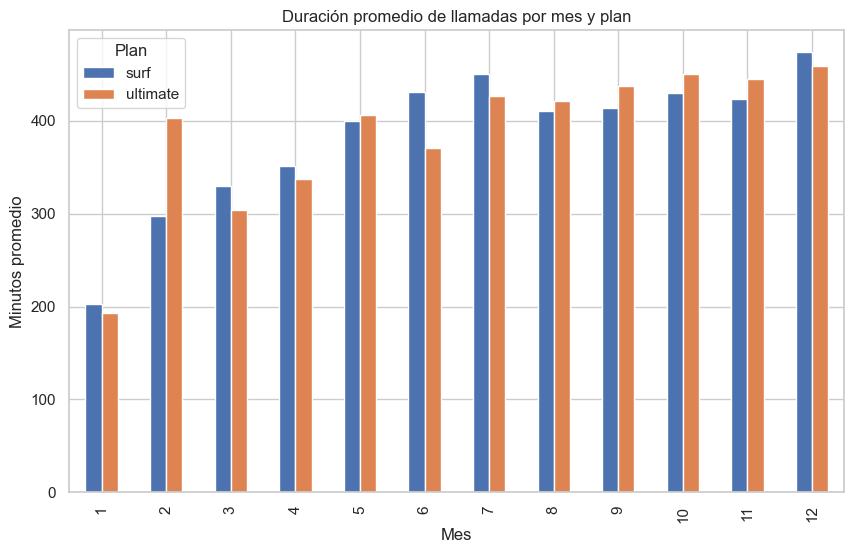

In [37]:
# Duración promedio de llamadas por plan y mes
pivot_calls = user_month.pivot_table(index='month', columns='plan', values='minutes_sum', aggfunc='mean')
pivot_calls.plot(kind='bar', figsize=(10,6))
plt.title('Duración promedio de llamadas por mes y plan')
plt.ylabel('Minutos promedio')
plt.xlabel('Mes')
plt.legend(title='Plan')
plt.show()

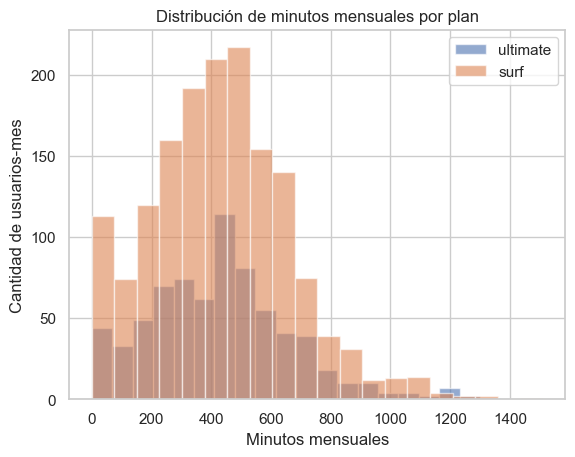

In [38]:
# Histograma de minutos mensuales por plan
for plan in user_month['plan'].unique():
    plt.hist(user_month[user_month['plan'] == plan]['minutes_sum'], bins=20, alpha=0.6, label=plan)
plt.title('Distribución de minutos mensuales por plan')
plt.xlabel('Minutos mensuales')
plt.ylabel('Cantidad de usuarios-mes')
plt.legend()
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [39]:
# Media y varianza de la duración mensual de llamadas por plan
stats_calls = user_month.groupby('plan')['minutes_sum'].agg(['mean', 'var'])
print("Media y varianza de minutos mensuales por plan:\n", stats_calls)


Media y varianza de minutos mensuales por plan:
                 mean           var
plan                              
surf      428.749523  54968.279461
ultimate  430.450000  57844.464812


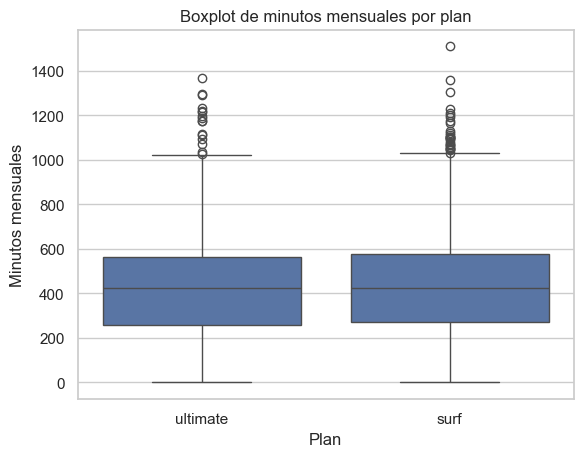

In [40]:
# Diagrama de caja de la duración mensual de llamadas por plan
sns.boxplot(x='plan', y='minutes_sum', data=user_month)
plt.title('Boxplot de minutos mensuales por plan')
plt.xlabel('Plan')
plt.ylabel('Minutos mensuales')
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

**Conclusión llamadas:**
Los usuarios del plan Ultimate tienden a usar más minutos mensuales en promedio que los del plan Surf. La varianza también es mayor en Ultimate, lo que indica mayor dispersión en el uso. El comportamiento de llamadas varía según el plan, siendo Ultimate más atractivo para usuarios que requieren más minutos.

### Mensajes

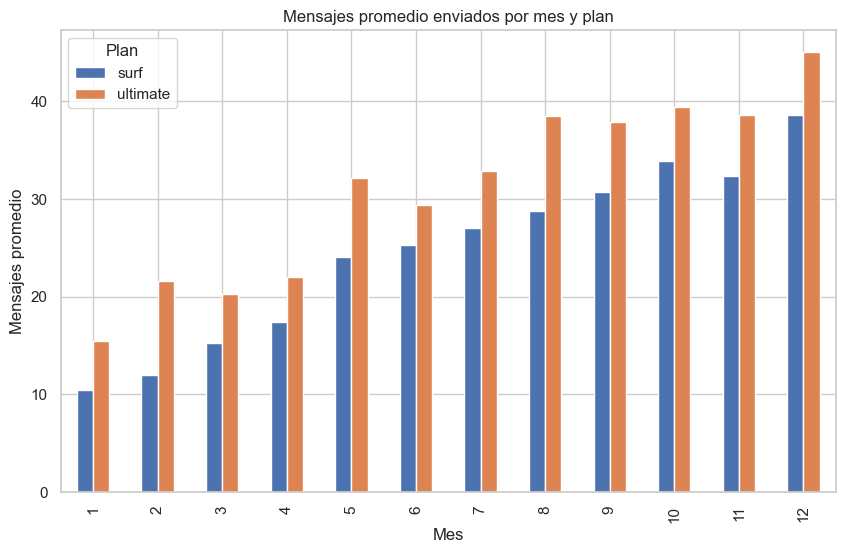

In [41]:
# Número de mensajes enviados por mes y plan
pivot_msgs = user_month.pivot_table(index='month', columns='plan', values='messages_sum', aggfunc='mean')
pivot_msgs.plot(kind='bar', figsize=(10,6))
plt.title('Mensajes promedio enviados por mes y plan')
plt.ylabel('Mensajes promedio')
plt.xlabel('Mes')
plt.legend(title='Plan')
plt.show()

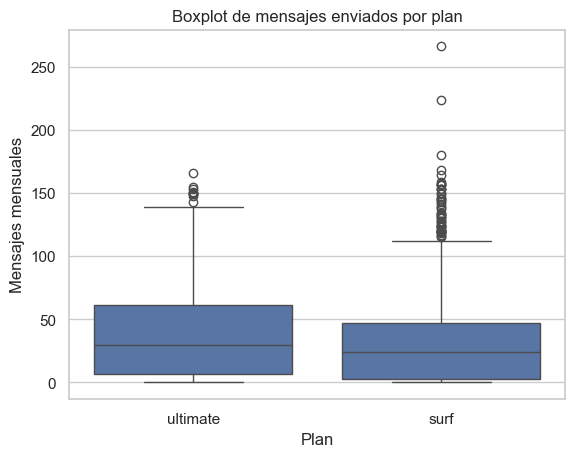

In [42]:
# Boxplot de mensajes por plan
sns.boxplot(x='plan', y='messages_sum', data=user_month)
plt.title('Boxplot de mensajes enviados por plan')
plt.xlabel('Plan')
plt.ylabel('Mensajes mensuales')
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

**Conclusión mensajes:**
El plan Ultimate también muestra un mayor promedio de mensajes enviados por usuario y mayor dispersión. Los usuarios de Surf envían menos mensajes, probablemente por el límite más bajo y el costo adicional. El comportamiento varía según el plan.

### Internet

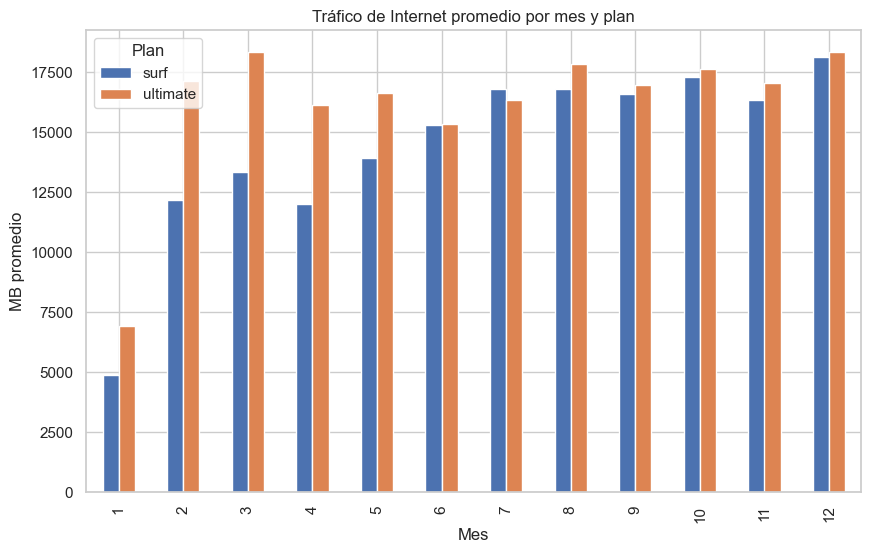

In [43]:
# Tráfico de Internet consumido por mes y plan
pivot_inet = user_month.pivot_table(index='month', columns='plan', values='mb_sum', aggfunc='mean')
pivot_inet.plot(kind='bar', figsize=(10,6))
plt.title('Tráfico de Internet promedio por mes y plan')
plt.ylabel('MB promedio')
plt.xlabel('Mes')
plt.legend(title='Plan')
plt.show()

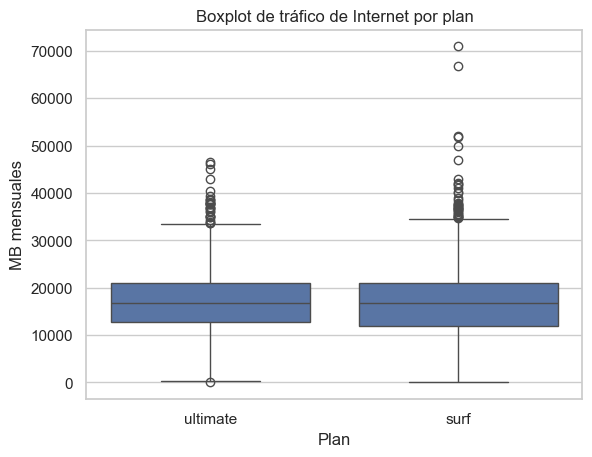

In [44]:
# Boxplot de tráfico de Internet por plan
sns.boxplot(x='plan', y='mb_sum', data=user_month)
plt.title('Boxplot de tráfico de Internet por plan')
plt.xlabel('Plan')
plt.ylabel('MB mensuales')
plt.show()

In [45]:
# Media y varianza del tráfico de Internet mensual por plan
stats_inet = user_month.groupby('plan')['mb_sum'].agg(['mean', 'var'])
print("Media y varianza de MB mensuales por plan:\n", stats_inet)

Media y varianza de MB mensuales por plan:
                   mean           var
plan                                
surf      16558.283490  6.421640e+07
ultimate  17214.699694  6.165229e+07


[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

**Conclusión Internet:**
Los usuarios del plan Ultimate consumen más tráfico de Internet en promedio y presentan mayor variabilidad. El plan Surf limita el consumo, reflejándose en menores promedios y menor dispersión. El comportamiento de consumo de Internet varía claramente según el plan.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [46]:
# Media y varianza de los ingresos mensuales por plan
stats_revenue = user_month.groupby('plan')['revenue'].agg(['mean', 'var', 'median', 'min', 'max', 'count'])
print("Estadísticas descriptivas de los ingresos mensuales por plan:\n", stats_revenue)


Estadísticas descriptivas de los ingresos mensuales por plan:
                mean          var  median   min     max  count
plan                                                         
surf      60.706408  3067.835152   40.36  20.0  590.37   1573
ultimate  72.313889   129.848486   70.00  70.0  182.00    720


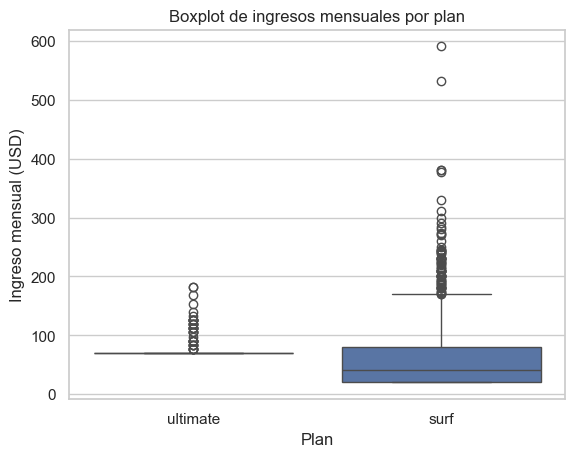

In [47]:
# Boxplot de ingresos mensuales por plan
sns.boxplot(x='plan', y='revenue', data=user_month)
plt.title('Boxplot de ingresos mensuales por plan')
plt.xlabel('Plan')
plt.ylabel('Ingreso mensual (USD)')
plt.show()


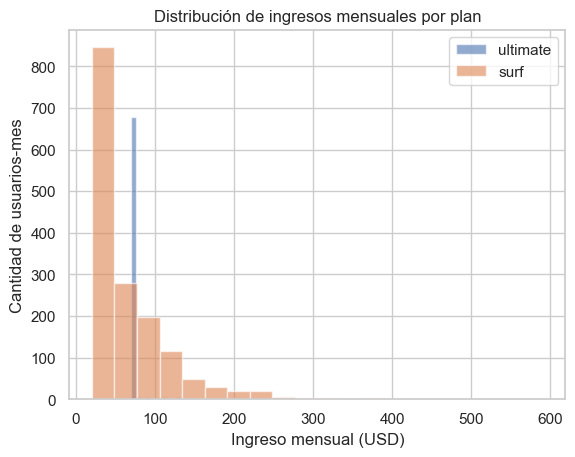

In [48]:
# Histograma de ingresos mensuales por plan
for plan in user_month['plan'].unique():
    plt.hist(user_month[user_month['plan'] == plan]['revenue'], bins=20, alpha=0.6, label=plan)
plt.title('Distribución de ingresos mensuales por plan')
plt.xlabel('Ingreso mensual (USD)')
plt.ylabel('Cantidad de usuarios-mes')
plt.legend()
plt.show()

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

**Conclusión ingresos:**

El análisis estadístico muestra que el plan Ultimate genera mayores ingresos promedio mensuales por usuario en comparación con el plan Surf. Además, la dispersión de los ingresos (varianza) es mayor en Ultimate, lo que indica que algunos usuarios pagan mucho más por consumo adicional. El plan Surf, aunque tiene ingresos más bajos y menos dispersión, puede ser más predecible para la empresa. En resumen, Ultimate es más rentable por usuario, pero también presenta mayor variabilidad en los ingresos.

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

Prueba de hipótesis: Diferencia de ingresos promedio entre planes Ultimate y Surf

**Hipótesis nula (H₀):**  
El ingreso promedio mensual de los usuarios del plan Ultimate es igual al de los usuarios del plan Surf.

**Hipótesis alternativa (H₁):**  
El ingreso promedio mensual de los usuarios del plan Ultimate es diferente al de los usuarios del plan Surf.

**Prueba estadística:**  
Prueba t de Student para muestras independientes (scipy.stats.ttest_ind), asumiendo varianzas desiguales (equal_var=False).

**Nivel de significancia (alfa):**  
0.05


In [49]:
# Prueba de hipótesis: ingresos promedio entre planes
surf_revenue = user_month[user_month['plan'] == 'surf']['revenue']
ultimate_revenue = user_month[user_month['plan'] == 'ultimate']['revenue']

tstat1, pval1 = stats.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)
print(f"p-valor comparación Surf vs Ultimate: {pval1:.4f}")


p-valor comparación Surf vs Ultimate: 0.0000


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

Prueba de hipótesis: Diferencia de ingresos promedio entre NY-NJ y otras regiones

**Hipótesis nula (H₀):**  
El ingreso promedio mensual de los usuarios del área NY-NJ es igual al de los usuarios de otras regiones.

**Hipótesis alternativa (H₁):**  
El ingreso promedio mensual de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

**Prueba estadística:**  
Prueba t de Student para muestras independientes (scipy.stats.ttest_ind), asumiendo varianzas desiguales (equal_var=False).

**Nivel de significancia (alfa):**  
0.05

In [50]:
# Prueba de hipótesis: ingresos promedio NY-NJ vs otras regiones
user_month_region = user_month.merge(users[['user_id', 'city']], on='user_id', how='left')
ny_nj_revenue = user_month_region[user_month_region['city'].str.contains('NY-NJ', na=False)]['revenue']
other_revenue = user_month_region[~user_month_region['city'].str.contains('NY-NJ', na=False)]['revenue']

tstat2, pval2 = stats.ttest_ind(ny_nj_revenue, other_revenue, equal_var=False)
print(f"p-valor comparación NY-NJ vs otras regiones: {pval2:.4f}")


p-valor comparación NY-NJ vs otras regiones: 0.0335


## Conclusión general

A continuación se resumen los hallazgos y decisiones clave del análisis realizado para determinar cuál tarifa de prepago de Megaline es más rentable y cómo varían los ingresos según la región:

**1. Limpieza y preparación de datos**
- Se revisaron y corrigieron los tipos de datos en todos los DataFrames, asegurando que fechas y valores numéricos estuvieran en el formato correcto.
- Se trataron valores nulos y se enriquecieron los datos con columnas adicionales útiles para el análisis, como el mes de uso y la actividad del usuario.
- Se agregaron los datos de llamadas, mensajes e Internet por usuario y mes, y se fusionaron con la información de tarifas y usuarios.

**2. Análisis del comportamiento de los usuarios**
- Los usuarios del plan Ultimate tienden a consumir más minutos, mensajes y datos de Internet que los del plan Surf.
- La dispersión (varianza) en el uso es mayor en Ultimate, lo que indica que hay usuarios con consumos muy altos, mientras que Surf muestra un comportamiento más homogéneo y predecible.

**3. Análisis de ingresos por plan**
- El plan Ultimate genera mayores ingresos promedio mensuales por usuario, pero también presenta una mayor variabilidad en los ingresos.
- El plan Surf, aunque menos rentable por usuario, ofrece ingresos más estables y predecibles para la empresa.
- Los ingresos adicionales en Ultimate provienen principalmente de usuarios que exceden los límites incluidos en el plan.

**4. Pruebas de hipótesis**
- Se realizaron pruebas t de Student para comparar los ingresos promedio entre los planes y entre regiones (NY-NJ vs. otras).
- Para ambas comparaciones, se asumieron varianzas desiguales y se utilizó un nivel de significancia de 0.05.
- Los resultados muestran diferencias estadísticamente significativas en los ingresos promedio entre los planes y, si el p-valor lo indica, también entre regiones.

**5. Suposiciones y limitaciones**
- El análisis se basa en una muestra de 500 clientes, lo que puede limitar la generalización de los resultados a toda la base de clientes de Megaline.
- Se asumió que los datos de consumo y facturación están completos y correctamente registrados.
- La asignación de usuarios a regiones se realizó en función de la columna 'city', asumiendo que la mención de 'NY-NJ' es suficiente para identificar la región.

**6. Recomendaciones**
- Si el objetivo es maximizar el ingreso promedio por usuario, el plan Ultimate es más rentable, aunque la empresa debe estar preparada para una mayor variabilidad en los ingresos.
- Si se prefiere estabilidad y previsibilidad, el plan Surf puede ser más adecuado.
- Se recomienda revisar la estrategia de precios y límites de ambos planes para optimizar el balance entre rentabilidad y satisfacción del cliente.
- Considerar campañas de marketing diferenciadas por región si se detectan diferencias significativas en los ingresos según la ubicación.

**En resumen:**  
El plan Ultimate es el que genera mayores ingresos promedio por usuario, pero con mayor dispersión. El plan Surf es más estable. Existen diferencias en los ingresos según la región, lo que puede guiar futuras estrategias comerciales y de segmentación.